author: aho:jchung

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# PART I
# 1. Matrix of random values
np.random.rand(3, 2)

array([[ 0.95347703,  0.41586906],
       [ 0.76577006,  0.17480804],
       [ 0.25152169,  0.89000211]])

In [12]:
# 2. 1-dimensional array of 12 sequential numbers convered to 4x3 array
a = np.arange(12).reshape(4, 3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [13]:
#3. Function that creates incremental nd array of dimension (1, n) with values b/w 0 and 1

def createarray(n):
    b = np.linspace(0, 1, n)
    b = np.expand_dims(b, axis = 0)
    return(b)

test = createarray(5)
print(test.shape)
print(test)
type(test)



(1, 5)
[[ 0.    0.25  0.5   0.75  1.  ]]


numpy.ndarray

In [14]:
#4. Generate 10x12 array and extract row 0-4 of columns 8 - 12
c = np.random.randint(10, size = (10, 12))
print(c)

[[3 6 8 2 0 5 6 6 1 8 5 8]
 [0 3 3 7 5 9 5 5 9 7 3 5]
 [7 3 9 9 5 7 2 8 5 3 4 8]
 [0 2 0 0 3 6 3 1 9 5 9 7]
 [3 0 5 3 1 6 4 4 9 4 9 8]
 [3 9 4 3 4 6 9 0 6 3 0 9]
 [4 4 7 8 1 9 9 1 2 1 3 1]
 [5 7 9 3 0 3 6 8 0 8 5 8]
 [3 6 8 0 8 6 1 8 5 4 8 7]
 [5 0 8 3 0 5 4 8 0 8 7 1]]


In [15]:
c = c[0:5, 7:13]
print(c)

[[6 1 8 5 8]
 [5 9 7 3 5]
 [8 5 3 4 8]
 [1 9 5 9 7]
 [4 9 4 9 8]]


[[ 0.   0.5  1. ]
 [ 0.   0.5  1. ]
 [ 0.   0.5  1. ]]


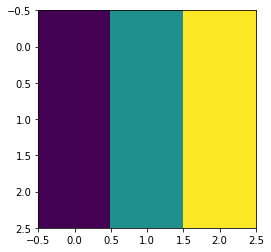

In [28]:
#5. Use previous function, get m vectors and bind them together for (m x n) matrix 
# plot matrix with matplotlib imshow

def gradient_matrix(m, n):
    matrix = [createarray(n) for _ in range(m)]
    matrix = np.vstack(matrix)
    return (matrix)
matrix = gradient_matrix(3, 3)
plt.imshow(matrix)
print(matrix)

In [29]:
image_matrix = plt.imread("heygirl.png")

(290, 290, 3)


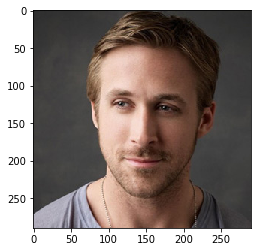

In [30]:
plt.imshow(image_matrix)
print(image_matrix.shape)

In [31]:
print(image_matrix.shape)

(290, 290, 3)


(290, 290, 3)


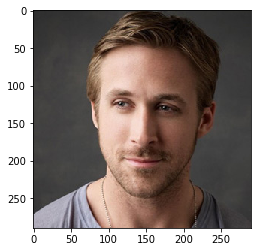

In [32]:
#new_image_matrix = image_matrix[100:800, 50:1000]
#plt.imshow(new_image_matrix)
new_image_matrix = plt.imread("heygirl.png")
print(new_image_matrix.shape)
plt.imshow(new_image_matrix)

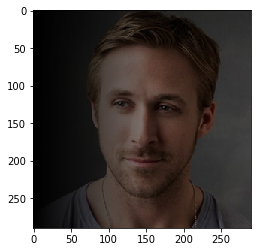

In [127]:
#Question 6
x, y, ch = new_image_matrix.shape[0], new_image_matrix.shape[1], new_image_matrix.shape[2]
gradient = gradient_matrix(x, y)

for i in range(ch):
    new_image_matrix[:, :, i] *= gradient
    
plt.imshow(new_image_matrix[:,:,:])


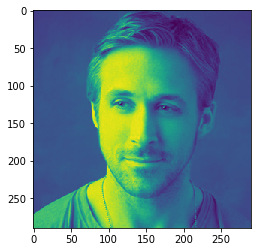

In [34]:
#split up rgb color channels
def rgb_split(image):
    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]
    return (r,g,b)

r, g, b = rgb_split(new_image_matrix)

plt.imshow(r)

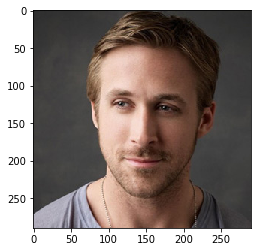

In [36]:
#merge rgb color channels
def rgb_merge(r, g, b):
    return np.stack((r,g,b), axis = 2)
                     
merged_image = rgb_merge(r, g, b)
                     
plt.imshow(merged_image)

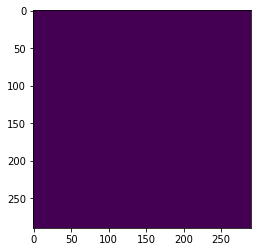

In [37]:
# adjust rgb

def adjust_rgb(ch, interp_values_array):
    flat_array = ch.flatten()
    interp_line = np.linspace(0, 1, len(interp_values_array))
    adjusted = np.interp(flat_array, interp_line, interp_values_array)
    return (adjusted.reshape(ch.shape))

normalish = [0, 0.25, 0.5, 0.75, 1]
#supercolorcontrast = [1, 0.75, 0.5, 0.25, 0] 
boostlow = [0.8, 0.75, 0.6, 0.5, 0.5, 0.5] #make lower values more of the color
boosthigh = [0.25, 0.35, 0.7, 0.75, 0.8, 0.9] #make more of the higher values
superboost = [0, 0.05, 0.10, 0.15, 0.4, 0.7, 0.7, 0.7, 0.7] #super boost on high values 


In [128]:
def vignette(m,n,definition):
    mask = np.ones((m, n))
    return ([[np.clip(((np.sin(np.pi * (x/n))) + (np.sin(np.pi * (y/m)))) ** definition, 0, 1) for x in range(n)] for y in range(m)])

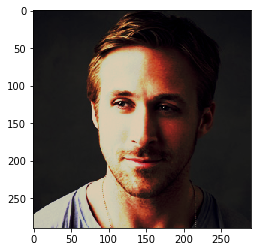

In [39]:
#LO-FI
adjusted_r = adjust_rgb(r, [0, 0.01, 0.10, 0.15, 0.4, 0.75, 0.8, 0.8, 0.9])
adjusted_g = adjust_rgb(g, [0, 0.01, 0.10, 0.15, 0.4, 0.75, 0.8, 0.8, 0.9])
adjusted_b = adjust_rgb(b, [0, 0.05, 0.10, 0.15, 0.4, 0.7, 0.7, 0.7, 0.7])
plt.imshow(adjusted_b)

merged_image = rgb_merge(adjusted_r, adjusted_g, adjusted_b)
plt.imshow(merged_image)


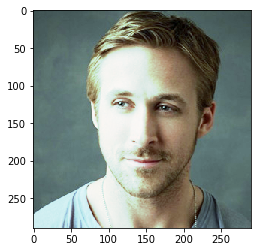

In [62]:
#rgb 89, 107, 110
#nashville 42, 112, 128
bluer_blacks = np.clip(b + 0.1, 0, 1.0)
greener_blacks = np.clip(g + 0.3, 0, 1.0)

#Nashville
adjusted_r = adjust_rgb(r, [0, 0.7, 1])
adjusted_g = adjust_rgb(g, [0, 0.9, 1])
adjusted_b = adjust_rgb(b, [0, 0.9, 1])
plt.imshow(adjusted_b)

merged_image = rgb_merge(adjusted_r, adjusted_g, adjusted_b)
plt.imshow(merged_image)


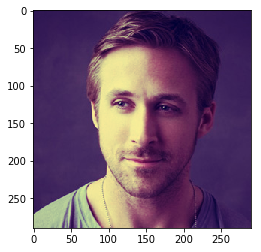

In [126]:
#X-Pro II 
#boost_lower midtones on g
#to-do: make a little warmer(red?), tone down highlights, too much contrast
#boost_midtones = [.1, .2, .4, .6, .6, .6, .7, .8, .9]
bluexpro = [.2, .37, .55, .6, .6]

xpro = rgb_merge(r, adjust_rgb(g, boost_lower), adjust_rgb(b, bluexpro))
plt.imshow(xpro)

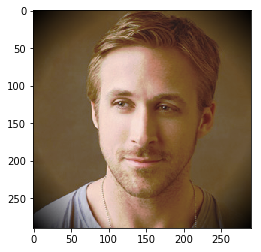

In [92]:
#Earlybird
#Less shadows
#Yellow tone (R + G)

bluer_blacks = np.clip(b + 0.3, 0, 1.0)

less_shadows = [0.8, 0.75, 0.7, 0.6, 0.5]

#boost_midtones = [0.25, 0.30, 0.35, 0.4, 0.4, 0.45, 0.5, 0.4, 0.35, 0.3]
boost_midtones = [.1, .2, .4, .6, .6, .6, .7, .8, .9]
boost_lower = [0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0] #midtone contrast boost

#earlybird = rgb_merge(r, g, adjust_rgb(b, normalish))
#earlybird = rgb_merge(adjust_rgb(r, [0.9]), adjust_rgb(g, [0.9]), adjust_rgb(b, [0.75]))
edit_r = adjust_rgb(r, [0.15, 0.3, 0.4, 0.45, 0.5, 0.6, 0.75, 0.8, 0.9, 1.0])
edit_g = adjust_rgb(g, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1.0])
edit_b = adjust_rgb(b, [.1, .15, .15, .35, .5, .6, .75, .8, .9, 1.0])

earlybird = rgb_merge(edit_r, edit_g, edit_b)

#earlybird = applyall(r, g, b, boost_midtones)

x,y,ch = earlybird.shape[0],earlybird.shape[1],earlybird.shape[2]


test = np.asarray(vignette(x,y,1))


for i in range(ch):
    earlybird[:,:,i] *= test  

plt.imshow(earlybird)
